# XBOX vs PC

## Введение

В данном проекте мы исследуем данные о продажах видеоигр.
Проект будет проводится в несколько этапов: 1. Обзор данных; 2. Предообработка данных; 3. Анализ данных; 4. Проверка гипотез. 

Обзор данных поможет понять проблемные участки.

В ходе предобратботки данных данные будут приведены к наиболее удобному для аботы виду. Для этого будет проведено переименование столбцов, устранение дубликатов, устранение пустых значений, дополнительные подготовительные работы.

В ходе анализа будет рассмотрены распределения данных по годам, платформам и жанрам. 

Итогом проекта будет рассмотрение гипотез: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Обзор данных

In [2]:
# import section
from scipy import stats as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#читаем данные из файла
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5814,Disney's The Emperor's New Groove,PS,2000.0,Platform,0.17,0.12,0.0,0.02,66.0,7.2,E
5441,Banjo-Kazooie: Grunty's Revenge,GBA,2003.0,Platform,0.24,0.09,0.0,0.01,72.0,8.1,E
14356,Batman: A Telltale Game Series,X360,2016.0,Adventure,0.01,0.02,0.0,0.00,NaN,NaN,NaN
15693,ESPN NFL Primetime 2002,XB,2002.0,Sports,0.01,0.00,0.0,0.00,57.0,tbd,E
13433,Jonah Lomu Rugby Challenge,PC,2011.0,Sports,0.00,0.04,0.0,0.01,NaN,NaN,NaN
1969,Dora the Explorer: Dora Saves the Mermaids,DS,2007.0,Platform,0.97,0.01,0.0,0.07,44.0,tbd,E
12466,Alone in the Dark,PS2,2008.0,Adventure,0.03,0.02,0.0,0.01,47.0,5.4,M
9160,The Operative: No One Lives Forever,PS2,2002.0,Shooter,0.07,0.05,0.0,0.02,67.0,8,T
12222,Army Men: Green Rogue,PS,2001.0,Action,0.04,0.02,0.0,0.00,NaN,NaN,NaN
2509,Need for Speed: Hot Pursuit 2,XB,2002.0,Racing,0.68,0.11,0.0,0.03,75.0,6.4,E


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


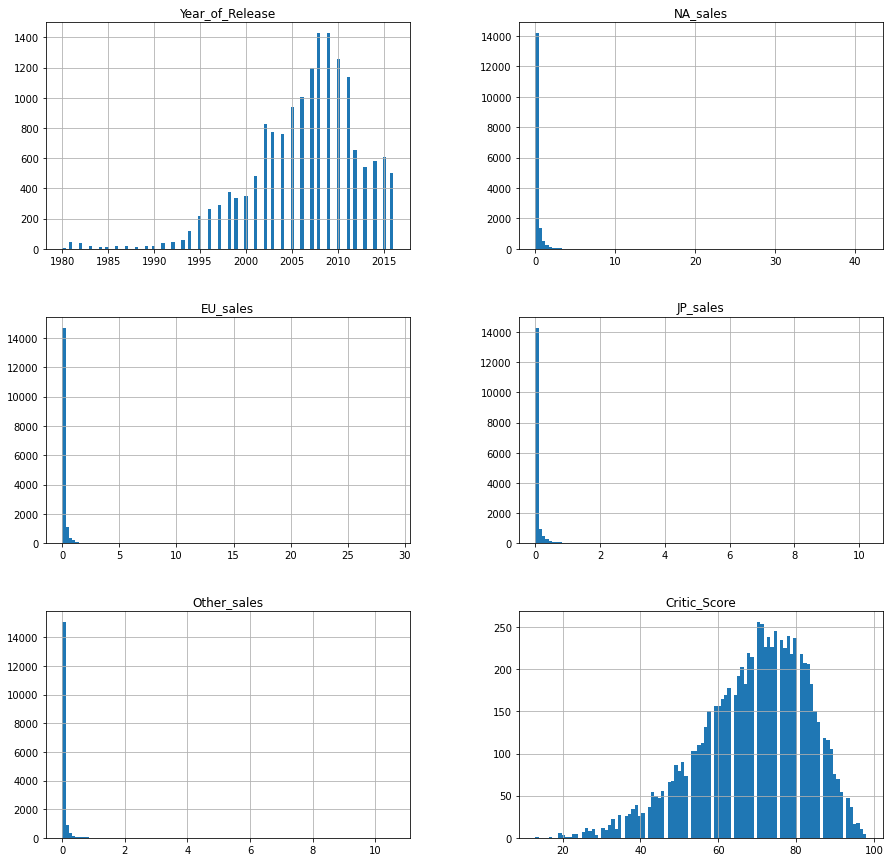

In [7]:
data.hist(figsize=(15,15), bins=100);

Вывод:
В датасете присутствуют пропуски и неопределенные значения. 
Столбцы с рейтингом и оценкой пользователей требуют приведение типов.
Распределение по столбцам sales показывает что возможны выбросы или неправильно введенные данные. 


## Предобработка данных

### Переименование столбцов

In [8]:
# переименование столбцов
data.rename(columns=str.lower, inplace=True)

### Обработка пропусков

В этом разделе мы обработаем пропуске, где это возможно. 
К пропускам могут приводить такие причины, как: потеря данных при выгрузке из базы данных; отсутствие данных при первичном занесении в базу данных; ошибки при занесении данных.

In [9]:
#посмотрим срез по name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#избавимся от эттих строк. таким образом удалим пустые значения из столбцов name и genre
data.dropna(subset=['name'], inplace=True)

In [11]:
data[data['name'].isna()] #check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [12]:
# рассмотрим уникальные значения столбца rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
#заменим значение NaN на 'other'
data['rating'].fillna('other', inplace=True)

In [14]:
data['rating'].unique()#check

array(['E', 'other', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Пропуски в столбцах year_of_release, critic_score, user_score оставляем как есть. Т.к. нет возможности восстановить данные по остальному датасету

Значение TBD означает, что было недостаточно оценок для выставления рейтинга. Имеет смысл заменить значение TBD на NA

In [15]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
9.6       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [16]:
# заменим занчения tbd на na
data.loc[data['user_score'] == "tbd", ['user_score']] = np.NaN 

In [17]:
# приведем значения к числовым
data['user_score'] = data['user_score'].apply(pd.to_numeric)

In [18]:
data['user_score'].dtypes #check

dtype('float64')

In [19]:
#создадим столбец с сумой продаж по всем регионам
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +data['other_sales']

In [20]:
#удалим пропуски в столбце year_of_release
data.dropna(subset=['year_of_release'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


Вывод: 
Мы удалили 2 строки с пропусками в столбцах genre и name. Удалили пропуски в столбце year_of_release. Переименовали столбцы. Привели значение столбца user_score к цифровому виду. Пропущенные значения в остальных столбцах восстановить не удается.

Причины, которые могли привести к пропускам: 
1. Ошибки при вводе данных
2. Ошибки при выгрузке данных
3. Отсутствие данных на момент ввода(рейтинги и оценки не были проставлены по инживидуальным причинам)

## Исследовательский анализ данных

### Выпуск игр по годам

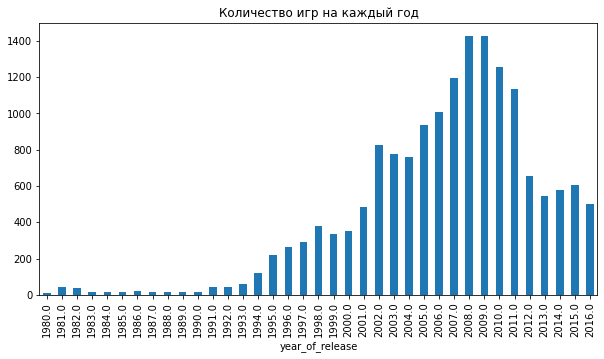

In [21]:
data.groupby('year_of_release')['name'].count().plot(figsize=(10,5), kind='bar', title='Количество игр на каждый год');

In [22]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

In [23]:
# данные до 1995 года можно считать несущественными

### Срок жизни платформ

In [24]:
# выберем платформы с наибольшими продажами
col1 = list(data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(20).index)

In [25]:
data1 = data.query('platform in @col1')

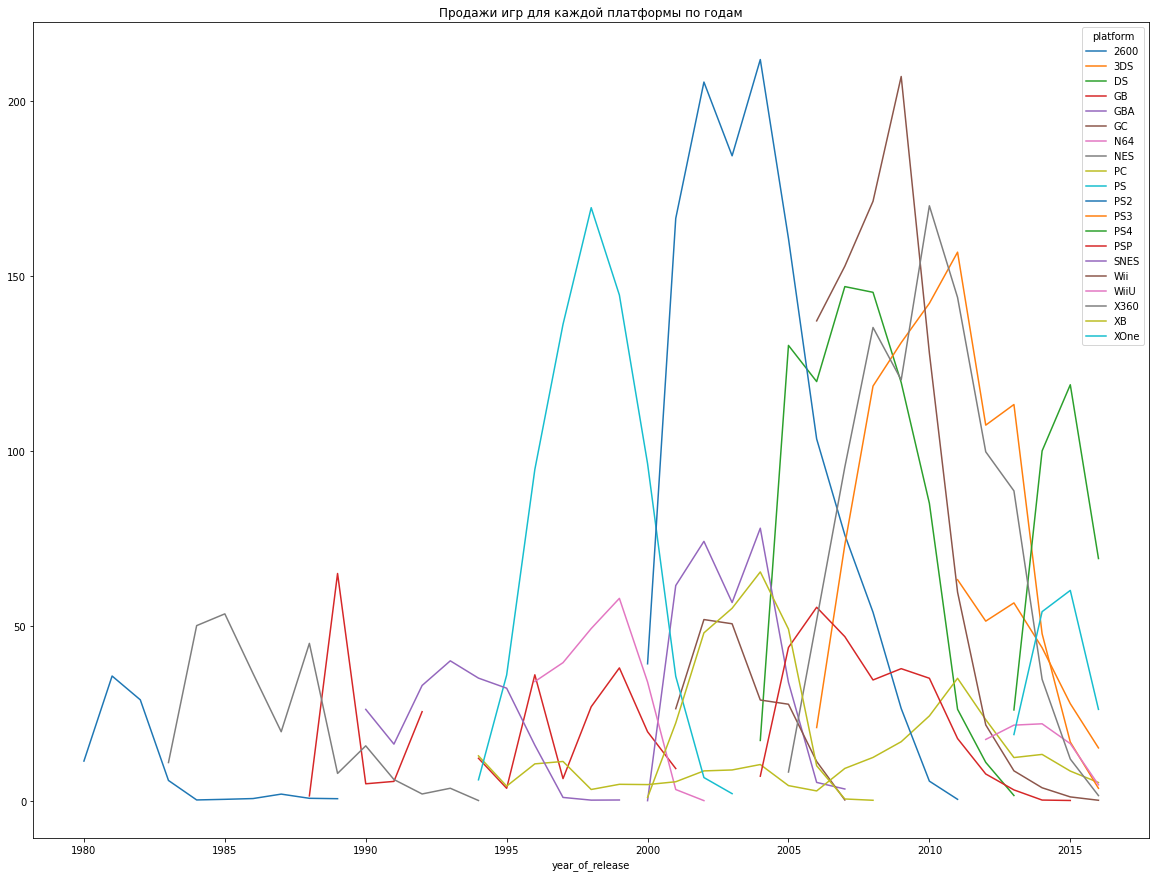

In [26]:
data1.pivot_table(index='year_of_release', 
                  columns='platform', 
                  values='all_sales', 
                  aggfunc=np.sum
                 ).plot(figsize=(20,15),
                        title='Продажи игр для каждой платформы по годам');

In [27]:
# сгруппируем выборку чтобы найти средний срок жизни платформы
data2 = data1.groupby('platform')['year_of_release'].agg(['max', 'min', lambda x: x.max() - x.min()])
data2

,max,min,<lambda_0>
platform,,,
2600,1989.0,1980.0,9.0
3DS,2016.0,2011.0,5.0
DS,2013.0,1985.0,28.0
GB,2001.0,1988.0,13.0
GBA,2007.0,2000.0,7.0
GC,2007.0,2001.0,6.0
N64,2002.0,1996.0,6.0
NES,1994.0,1983.0,11.0
PC,2016.0,1985.0,31.0


***Средний срок жизни платформы***

Для нахождения срдеднего срока жизни платформы уберем выбросы - DS и PC. Nintendo DS было выпущено в 2004 году
и не может иметь срок жизни 28 лет. Данные по PC не показательны для рассмотрения игровых платформ и должны рассматриваться отдельно.


In [28]:
data2[data2['<lambda_0>'] < 28]['<lambda_0>'].mean()

8.11111111111111

Средний срок жизни платформ около 8 лет.

### Продажи по платформам

In [29]:
#выберем актуальный период. Это будет срок не старше половины среднего срока жизни платформ
data_f = data.query('2011 < year_of_release < 2016')
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 16 to 16707
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2384 non-null   object 
 1   platform         2384 non-null   object 
 2   year_of_release  2384 non-null   float64
 3   genre            2384 non-null   object 
 4   na_sales         2384 non-null   float64
 5   eu_sales         2384 non-null   float64
 6   jp_sales         2384 non-null   float64
 7   other_sales      2384 non-null   float64
 8   critic_score     1080 non-null   float64
 9   user_score       1269 non-null   float64
 10  rating           2384 non-null   object 
 11  all_sales        2384 non-null   float64
dtypes: float64(8), object(4)
memory usage: 242.1+ KB


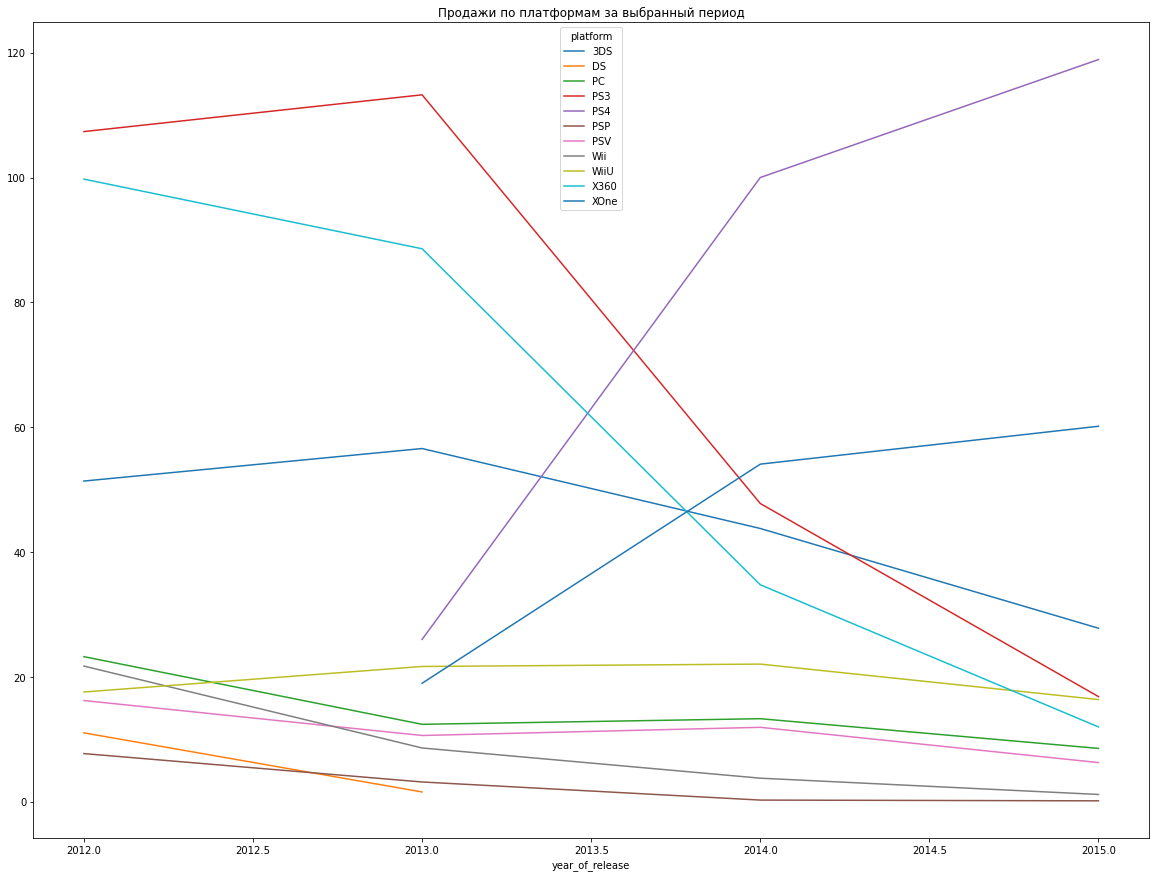

In [30]:
data_f.pivot_table(index='year_of_release', 
                   columns='platform', 
                   values='all_sales', 
                   aggfunc=np.sum
                  ).plot(figsize=(20,15),
                        title='Продажи по платформам за выбранный период');

In [31]:
# выберем платформы с наибольшими продажами
data_f.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(20)

platform
PS3     285.19
PS4     244.89
X360    235.02
3DS     179.47
XOne    133.17
WiiU     77.59
PC       57.40
PSV      44.93
Wii      35.19
DS       12.55
PSP      11.19
Name: all_sales, dtype: float64

По продажам лидируют PS4, PS3, X360, 3DS и XOne. Продажи по всем платформам, кроме PS4 и XOne, падают.

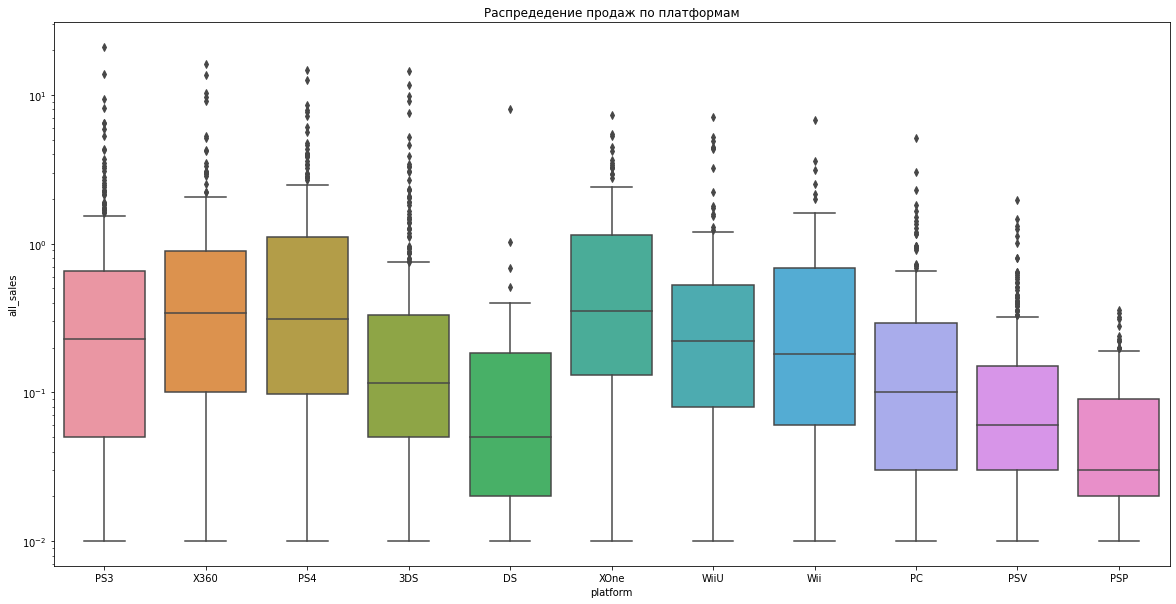

In [32]:
# построим распределение продаж по платформам 
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale("log")
boxplot = sns.boxplot(data=data_f, 
            x='platform', 
            y='all_sales');
boxplot.axes.set_title('Распредедение продаж по платформам');

Вывод: Большинство игр не приносят большой прибыли. Основные продажи на платформах зависят от единичнх игр.

### Продажи по PS4

In [33]:
#рассмотрим продажи по ps4
data_ps4 = data_f.query('platform == "PS4"')

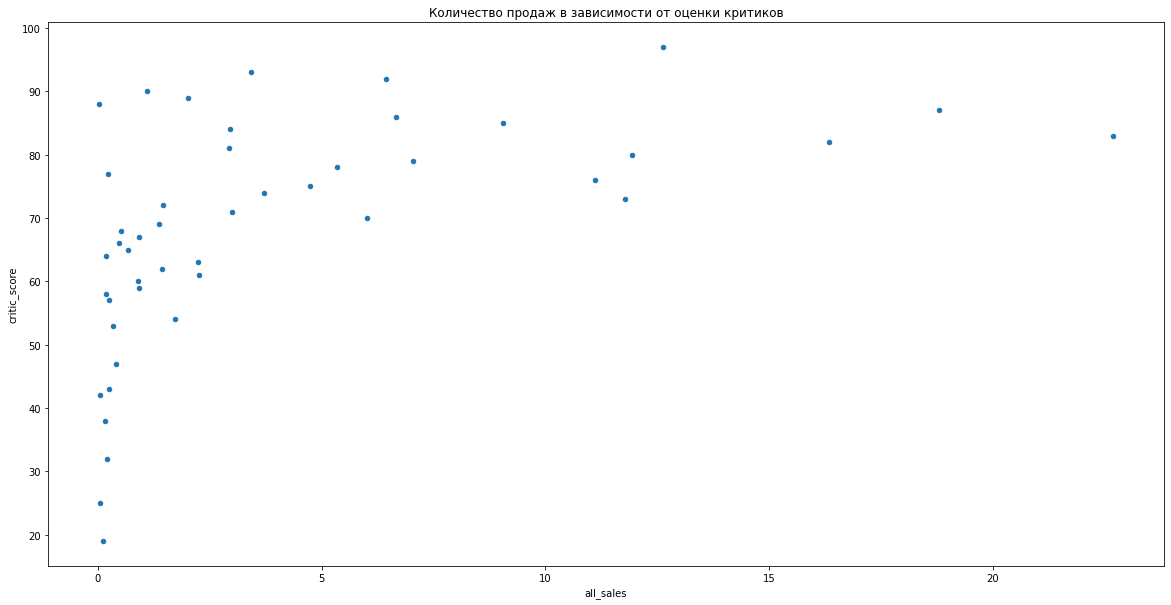

In [34]:
#рассмотрим, как влияют на продажи отзывы критиков
data_ps4.groupby('critic_score').sum().reset_index()\
.plot(y='critic_score', 
      x='all_sales', 
      figsize=(20,10), 
      kind='scatter',
      title='Количество продаж в зависимости от оценки критиков');

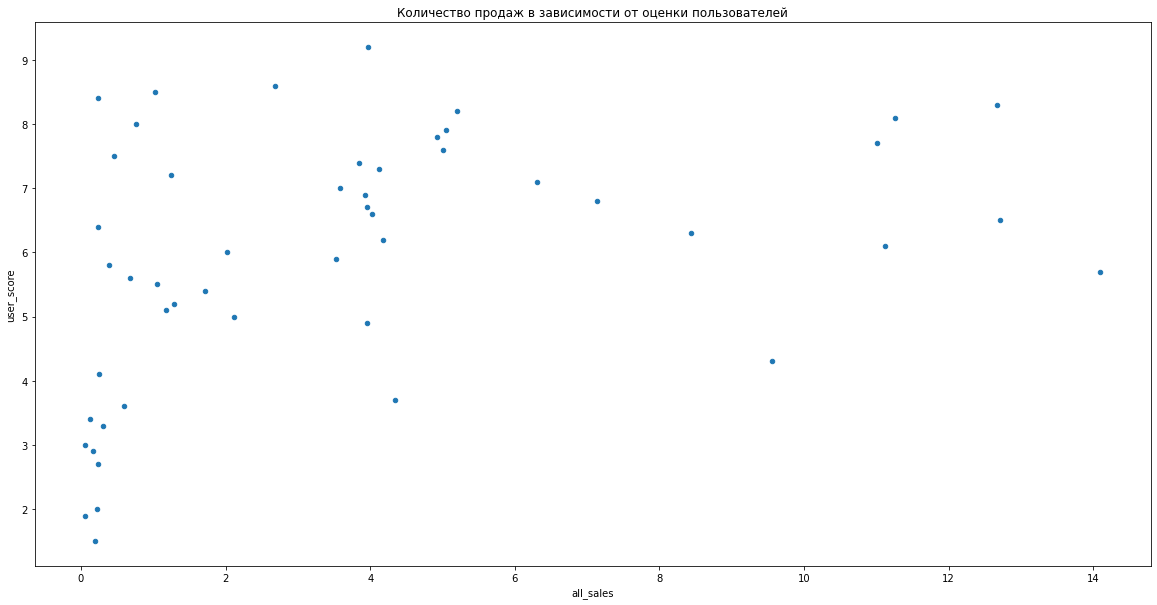

In [35]:
#рассмотрим, как влияют на продажи отзывы пользователей
data_ps4.groupby('user_score').sum().reset_index().plot(y='user_score', 
                                                        x='all_sales',
                                                        figsize=(20,10), 
                                                        kind='scatter', 
                                                        title='Количество продаж в зависимости от оценки пользователей');

In [36]:
#рассчитаем корреляцию
display(
data_ps4['critic_score'].corr(data_ps4['all_sales']),   
data_ps4['user_score'].corr(data_ps4['all_sales']))

0.4318482049982005

0.024230832360622557

Вывод: 
1. зависимость продаж от оценки критиков показывает низкую корреляцию. На графике можно наблюдать, что игры с рейтингом критиков выше 70 имеют значительно большие продажи, чем все остальные.
2. зависимость продаж от оценок пользователей не коррелирует. При этом игры с оценокой пользователей ниже 3 имеют продажи ниже, чем остальные.

### Сравение продаж по платформам

In [37]:
#рассмотрим продажи по PS3
data_PS3 = data_f.query('platform == "PS3"')

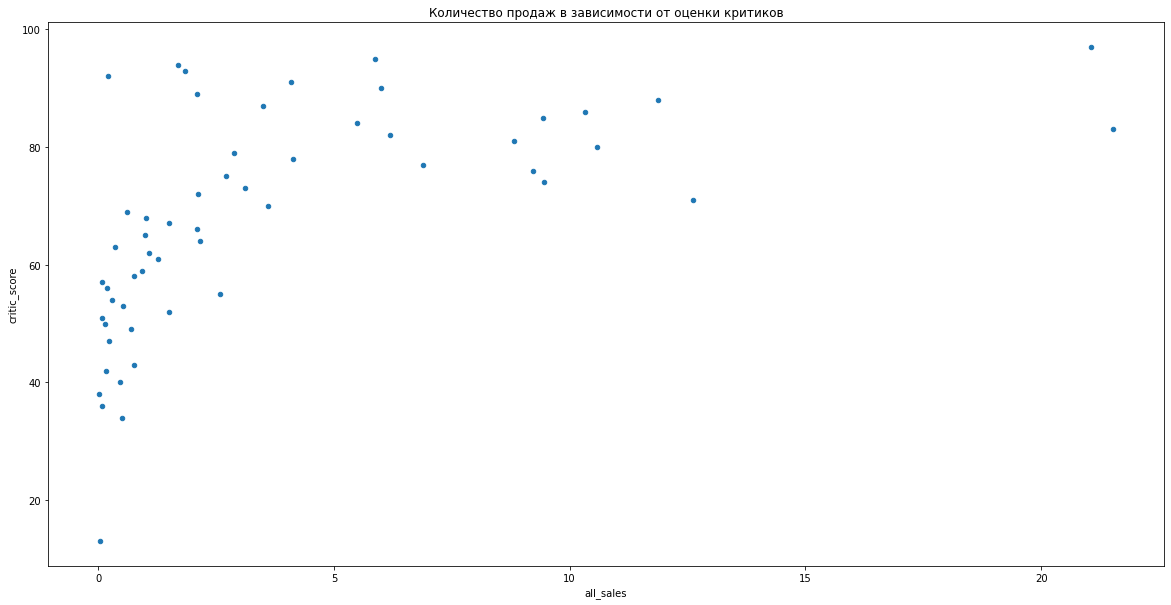

In [38]:
#рассмотрим, как влияют на продажи отзывы критиков
data_PS3.groupby('critic_score').sum().reset_index().plot(y='critic_score', 
                                                          x='all_sales',
                                                          figsize=(20,10), 
                                                          kind='scatter', 
                                                          title='Количество продаж в зависимости от оценки критиков');

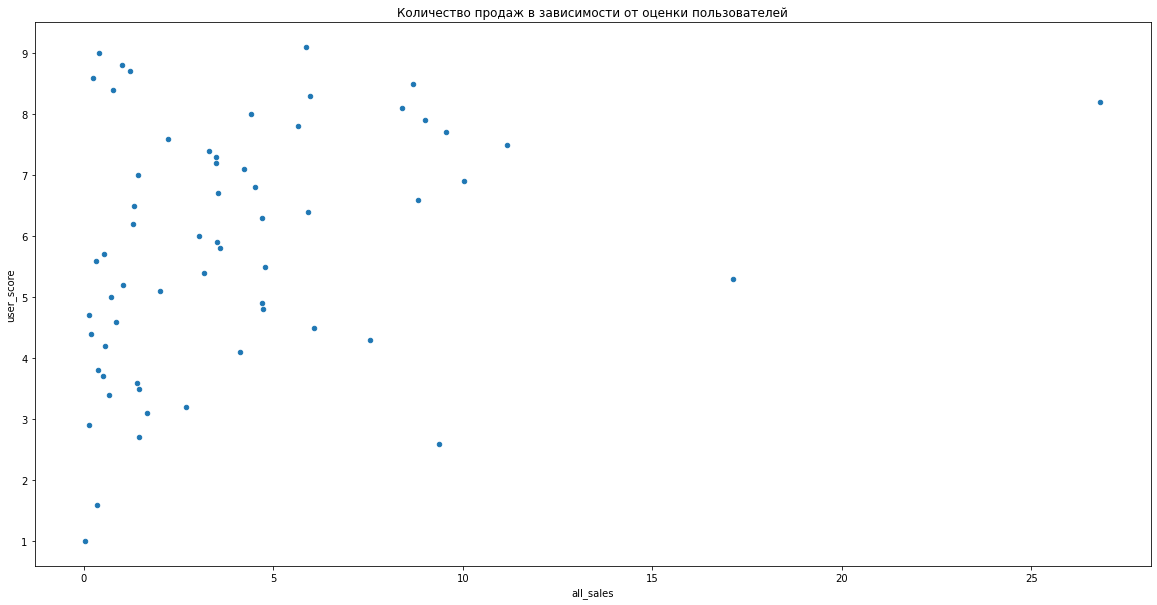

In [39]:
#рассмотрим, как влияют на продажи отзывы пользователей
data_PS3.groupby('user_score').sum().reset_index().plot(y='user_score', 
                                                        x='all_sales', 
                                                        figsize=(20,10), 
                                                        kind='scatter', 
                                                        title='Количество продаж в зависимости от оценки пользователей');

In [40]:
#рассмотрим продажи по x360
data_x360 = data_f.query('platform == "X360"')

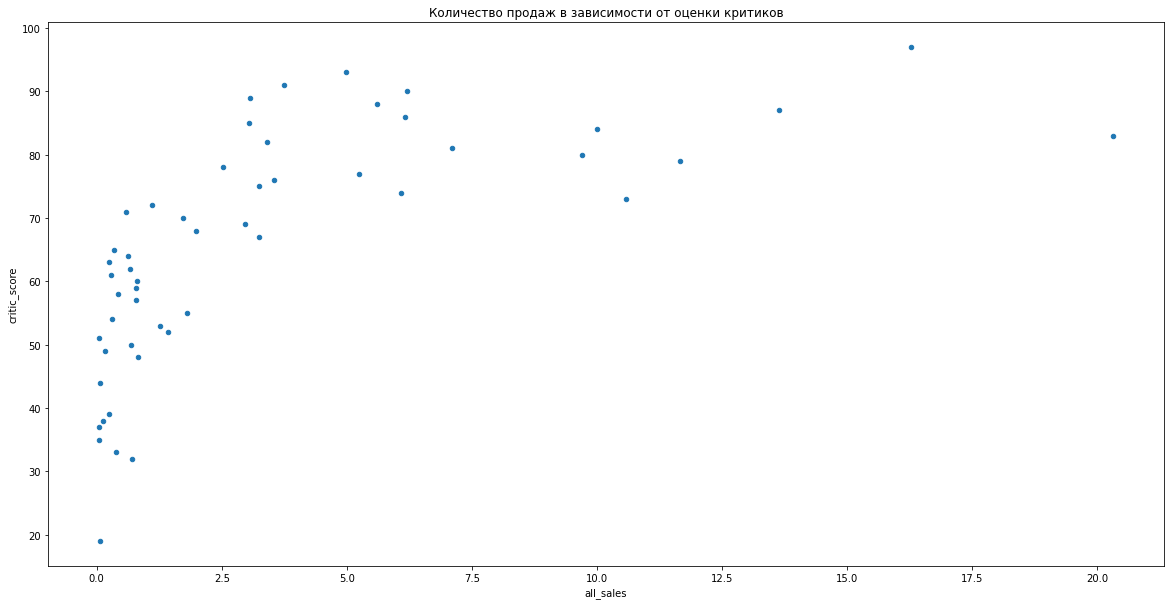

In [41]:
#рассмотрим, как влияют на продажи отзывы критиков
data_x360.groupby('critic_score').sum().reset_index().plot(y='critic_score', 
                                                           x='all_sales', 
                                                           figsize=(20,10), 
                                                           kind='scatter', 
                                                           title='Количество продаж в зависимости от оценки критиков');

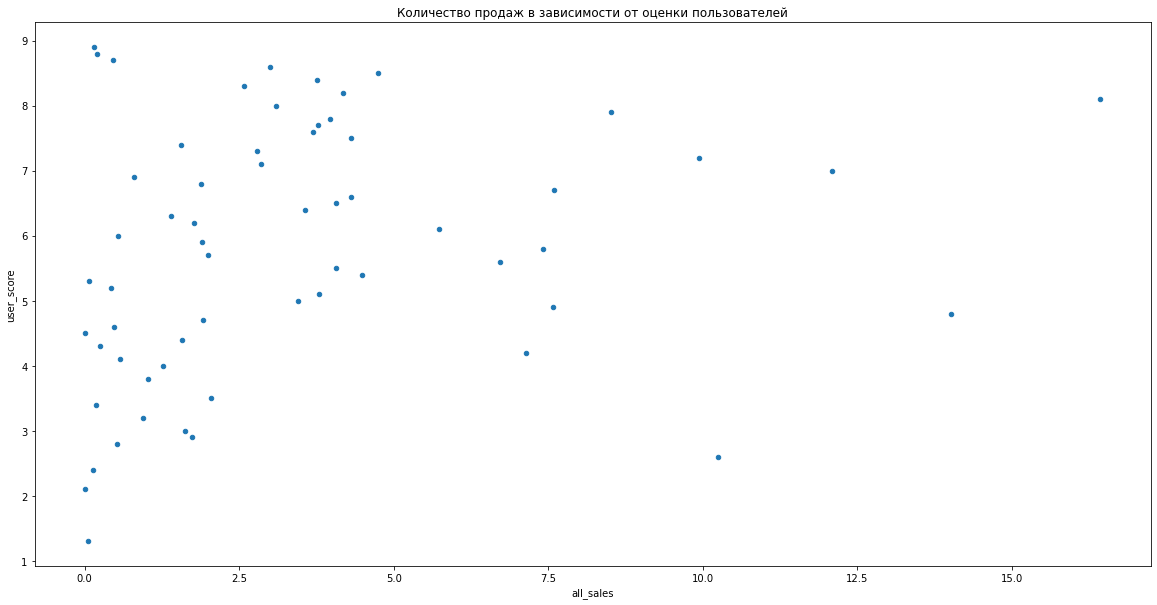

In [42]:
#рассмотрим, как влияют на продажи отзывы пользователей
data_x360.groupby('user_score').sum().reset_index().plot(y='user_score', 
                                                         x='all_sales',
                                                         figsize=(20,10), 
                                                         kind='scatter', 
                                                         title='Количество продаж в зависимости от оценки пользователей');

Вывод: сравнение продаж от оценок по другим платформам показывает аналогичные результаты

### Распределние по жанрам

In [43]:
#сгруппируем данные по жанрам
data_f.groupby('genre')['all_sales'].sum().sort_values(ascending=False)


genre
Action          411.01
Shooter         266.51
Role-Playing    174.62
Sports          157.58
Misc             82.44
Platform         57.77
Racing           50.71
Fighting         40.02
Simulation       33.23
Adventure        25.61
Strategy         12.21
Puzzle            4.88
Name: all_sales, dtype: float64

In [44]:
data_f.groupby('genre')['all_sales'].agg([np.mean, np.median]).sort_values(by='mean', ascending=False)

,mean,median
genre,,
Shooter,1.417606,0.525
Platform,0.825286,0.285
Sports,0.716273,0.305
Racing,0.557253,0.230
Role-Playing,0.552595,0.150
Simulation,0.535968,0.150
Misc,0.515250,0.180
Action,0.481841,0.140
Fighting,0.430323,0.160


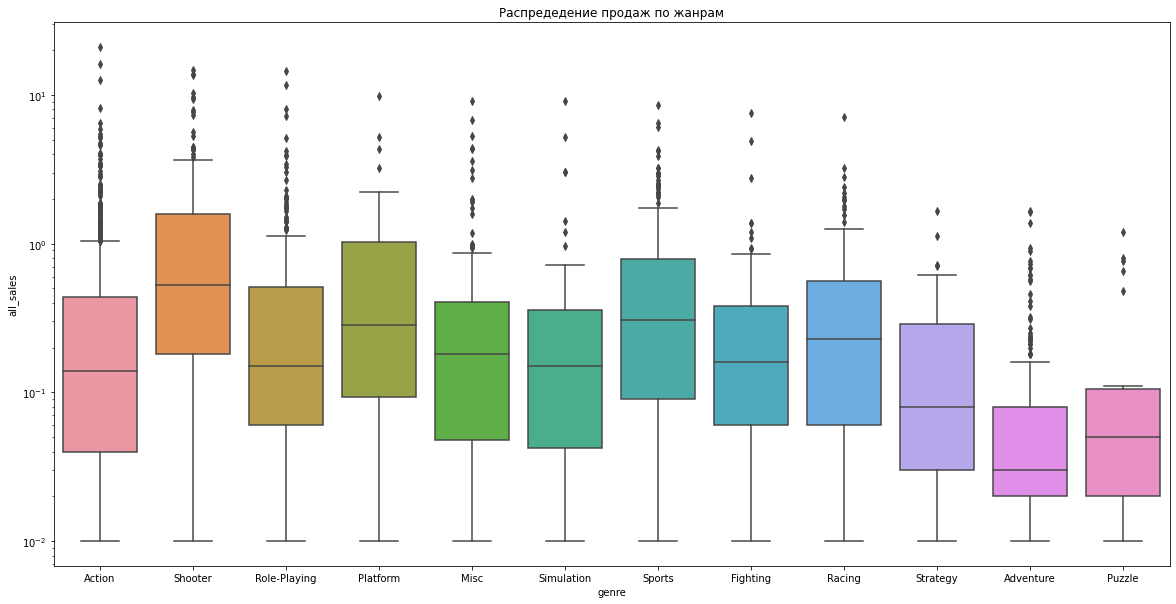

In [45]:
# построим распределение продаж по жанрам 
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale("log")
boxplot = sns.boxplot(data=data_f, 
            x='genre', 
            y='all_sales');
boxplot.axes.set_title('Распредедение продаж по жанрам');

Вывод: лидеры по продажам среди жанров шутеры и экшены. Самые низкие продажи у паззлов и стратегических игр. При этом в среднем лучший доход приносят шутеры и платформеры. 

Составим портрет пользователя для каждого региона (NA, EU, JP)

Рассмотрим:
1. Самые популярные платформы (топ-5).
2. Самые популярные жанры (топ-5).

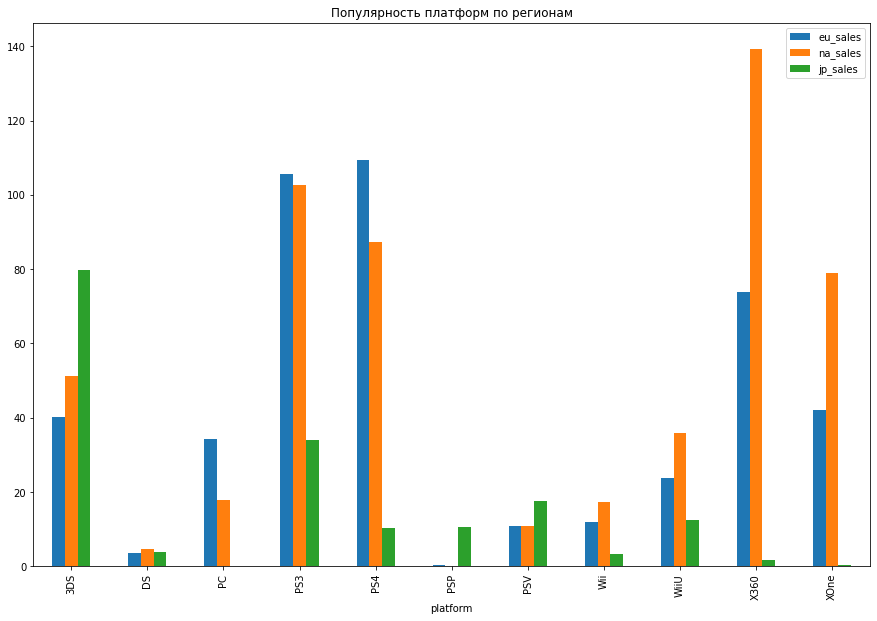

In [46]:
#сгруппируем данные по платформам и регионам
data_f.groupby('platform')[['eu_sales', 'na_sales', 'jp_sales']].sum().plot(kind='bar', 
                                                                            figsize=(15,10),
                                                                            title='Популярность платформ по регионам');

В европейском регионе лидируют PS3 и PS4. В североамериканском регионе лидирует x360 не далеко отстают PS3, PS4 и XOne. В японском регионе лидирует 3DS на втором месте PS3.

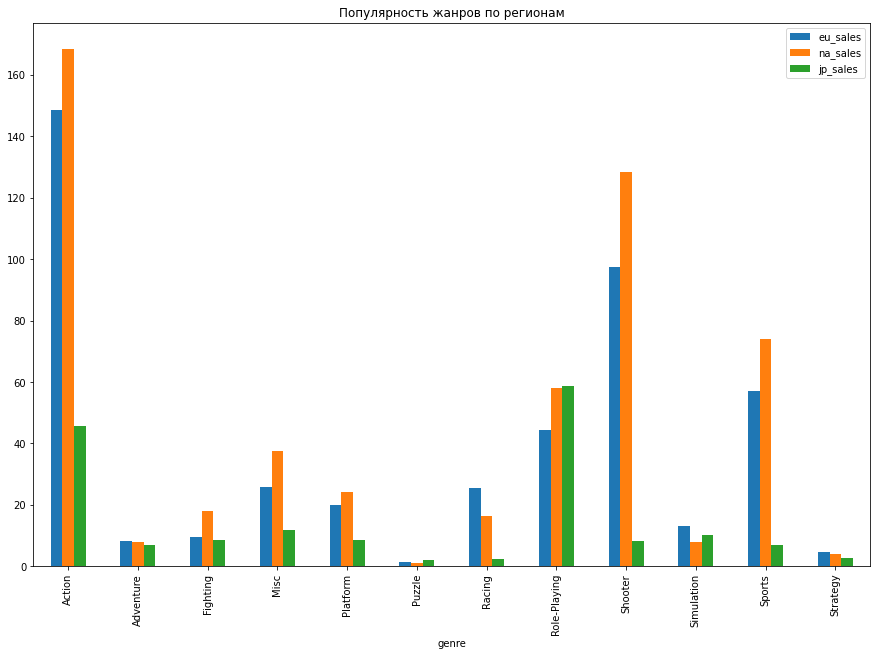

In [47]:
#сгруппируем данные по жанрам и регионам
data_f.groupby('genre')[['eu_sales', 'na_sales', 'jp_sales']].sum().plot(kind='bar', 
                                                                         figsize=(15,10),
                                                                         title='Популярность жанров по регионам');

Жанр экшн самый популярный в европейском и североамериканском регионах. Он на втором месте в японском регионе. В японском регоне наиболее популярны ролевые игры. 

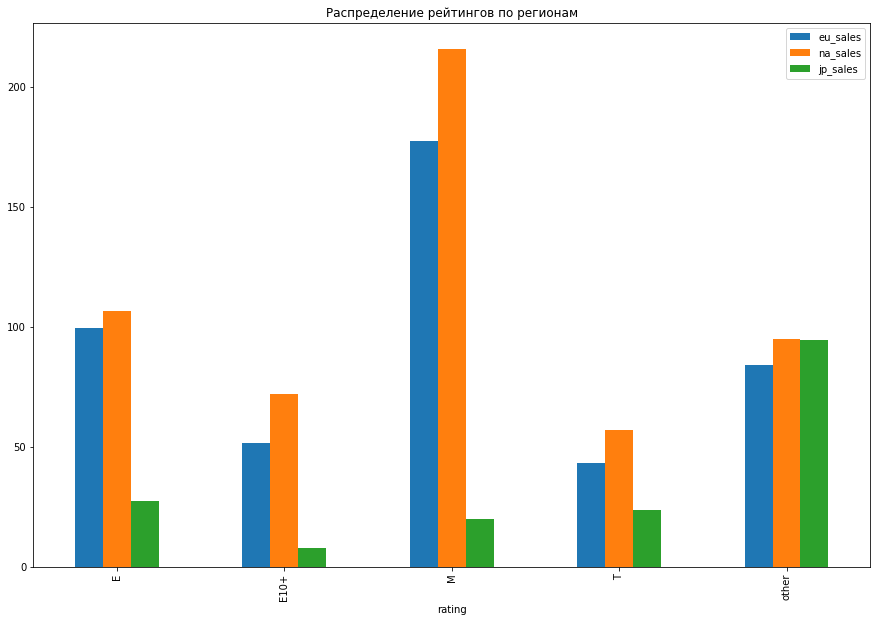

In [48]:
#сгруппируем данные по рейтингу и регионам
data_f.groupby('rating')[['eu_sales', 'na_sales', 'jp_sales']].sum().plot(kind='bar', 
                                                                          figsize=(15,10),
                                                                          title='Распределение рейтингов по регионам');

Игры с рейтингом М популярнее всего в европейском и североамериканском регионах. В япоском регионе отдают предпочтение играм без рейтинга. В европейском регионе игры без рейтирга так же представлены значительно.

Вывод:

В европейском и североамериканском регионах вкусы пользователей по жанрам и рейтингу игр совпадают. В североамериканском регионе пользователи имеют отличный от европейцев приоритет по платформам, предпочитают XOne, а не PS4. 

Японский регион отличется от остальных по всем проведенным исследованиям. Предпочитаемая платформа 3DS, жанр - ролевые игры, рейтинг игр - без рейтинга.

## Проверка гипотез

Проверяем гипотезу о пользовательских рейтингах Xbox и PC

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Для проверки гипотез будем использовать т-критерий Стьюдента для двух независимых выборок.

In [ ]:
#создадим выборки по ХOne и PC

sample_x = data_f.query('platform == "XOne"')['user_score'].dropna()
sample_pc = data_f.query('platform == "PC"')['user_score'].dropna()

#вызов метода для проверки гипотезы
results = st.ttest_ind(sample_x, sample_pc, equal_var = False)
# alpha = значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')




Проверяем гипотезу о жанрах

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
#создадим выборки по Action и Sports

sample_a = data_f.query('genre == "Action"')['user_score'].dropna()
sample_s = data_f.query('genre == "Sports"')['user_score'].dropna()

#вызов метода для проверки гипотезы
results = st.ttest_ind(sample_a, sample_s, equal_var = False)
# alpha = значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Выводы: 
1. Согласно провденному анализу мы можем сказать, что гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отвергается.
2. Согласно провденному анализу мы можем сказать, что гипотеза о не равенстве средних пользовательских рейтингов жанров Action и Sports отвергается.

Для проведения анализа было выбрано значение уровня значимости 5%, что является стандартным выбором для проверки гипотез.

## Общий вывод

В ходе данного исследования мы прошли несколько этапов: 1. Обзор данных; 2. Предообработка данных; 3. Анализ данных; 4. Проверка гипотез.

***На первом этапе - обзор данных***, было обнаружено, что в датасете присутствуют пропуски и неопределенные значения. Столбцы с рейтингом и оценкой пользователей требуют приведение типов. Распределение по столбцам sales показывает что возможны выбросы или неправильно введенные данные.

***На втором этапе*** была проведена предобработка данных. 
В ходе предобработки были устранены пропуски в столбцах genre, year_of_release и name. 
Пропуски были далены, поскольку их количество было не значительно. 
Были переименовали столбцы для удобства работы с датасетом. 
Привели значение столбца user_score к цифровому виду. 
В столбце rating пропуски были заменены на значание 'other'.
Пропущенные значения в столбцах с оценками восстановить не получаются  поскольку они не могут быть посчитаны на основании существующих в датасете значений.

***На третьем этапе*** был проведен исследовательский анализ данных. 

Для исследования был выбран интервал с 2012 до 2015 гг. поскольку данные за 2016г. могут быть не полные.

В ходе исследования были получены следующие результаты:
1. До 1995 года выпускалось менее 200 игр в год. Пик выпуска игр пришеллся на 2008, 2009 гг., когда было выпущено более 1400 игр.
2. Средний срок жизни платформы около 8 лет.
3. На конец периода представленного в датасете продажи по всем платформам, кроме XOne и PS4 падают.
4. Большинство игр не приносят больших продаж. 
5. Рейтинги пользователей не показательны, когда речь идет о продажах игр. 
6. Если рейтинг критиков более 70, то игра имеет хорошие продажи.
7. В среденем, шутеры и платформары приносят больше всего прибыли.

Далее были составлены портреты пользователей по разным регионам. В европейском и североамериканском регионах вкусы пользователей по жанрам и рейтингу игр совпадают. В североамериканском регионе пользователи имеют отличный от европейцев приоритет по платформам, предпочитают XOne, а не PS4. Японский регион отличется от остальных по всем проведенным исследованиям. Предпочитаемая платформа 3DS, жанр - ролевые игры, рейтинг игр - без рейтинга.

***На четвертом этапе*** были проверны следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Для проверки гипотез использовался т-критерий Стьюдента для двух независимых выборок.

Первую гипотезу отвергнуть, на уровне значимости 5%, не удалось, что означает, что средние пользовательские рейтенги на платформах Xbox One и PC одиинаковы. Вторая гипотеза была отвергнута, на уровне значимости 5%, что ознчает, что средние пользовательские рейтинги жанров Action и Sports разные. 








